### Problem Statement

Continuing with the same scenario, now that you have been able to successfuly predict each student GPA, now you will classify each Student based on they probability to have a successful GPA score.

The different classes are:

- Low     : Students where final GPA is predicted to be between: 0 and 2
- Medium  : Students where final GPA is predicted to be between: 2 and 3.5
- High    : Students where final GPA is predicted to be between: 3.5 and 5



### 1) Import Libraries

First let's import the following libraries, if there is any library that you need and is not in the list bellow feel free to include it

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns


c:\Users\Rodolfo\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### 2) Load Data

- You will use the same file from the previous activity (Student Performance Data)

In [2]:
data = pd.read_csv("Student_performance_data _.csv")
data

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


### 3) Add a new column called 'Profile' this column will have the following information

Based on the value of GPA for each student: 

- If GPA values between 0 and 2 will be labeled 'Low', 
- Values between 2 and 3.5 will be 'Medium', 
- And values between 3.5 and 5 will be 'High'.


In [4]:
# Agregar nueva columna Profile

data["Profile"] = pd.cut(data["GPA"], [0, 2, 3.5, 5], labels=["Low", "Medium", "High"], include_lowest = True)

data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,Profile
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0,Medium
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0,Medium
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0,Low
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0,Medium
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0,Low


### 4) Use Matplotlib to show a Pie chart to show the percentage of students in each profile.
- Title: Students distribution of Profiles
- Graph Type: pie

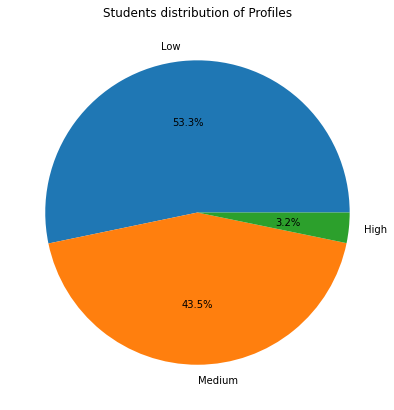

In [5]:
# Gráfica de pastel de los porcentajes de alumnos en cada categoría

plt.figure(figsize=(10, 7))

plt.pie(data["Profile"].value_counts(normalize=True) * 100, labels=["Low", "Medium", "High"], autopct="%.1f%%")

plt.title("Students distribution of Profiles")

plt.show()

### 5) Convert the Profile column into a Categorical Int

You have already created a column with three different values: 'Low', 'Medium', 'High'. These are Categorical values. But, it is important to notice that Neural Networks works better with numbers, since we apply mathematical operations to them.

Next you need to convert Profile values from Low, Medium and High, to 0, 1 and 2. IMPORTANT, the order does not matter, but make sure you always assign the same number to Low, same number to Medium and same number to High.

Make sure to use the fit_transform method from LabelEncoder.

In [6]:
label_enc = LabelEncoder()

In [7]:
data["Profile"] = label_enc.fit_transform(data["Profile"])

data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,Profile
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0,2
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0,2
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0,1
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0,2
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0,1


**Nota:**

* 2: "Medium"
* 1: "Low
* 0: "High

### 6) Select the columns for your model.

Same as the last excersice we need a dataset for features and a dataset for label.

- Create the following dataset:
   - A dataset with the columns for the model.
   - From that data set generate the 'X' dataset. This dataset will have all the features (make sure Profile is NOT in this dataset)
   - Generate a second 'y' dataset, This dataset will only have our label column, which is 'Profile'.
   - Generate the Train and Test datasets for each X and y:
      - X_train with 80% of the data
      - X_test with 20% of the data
      - y_train with 80% of the data
      - y_test with 20% of the data

In [8]:
# Dataset de features sin la columna Profile

X = data.iloc[:, [1, 4, 5, 6, 8, 10, 14]]

X.head()

,Age,ParentalEducation,StudyTimeWeekly,Absences,ParentalSupport,Sports,GradeClass
0,17,2,19.833723,7,2,0,2.0
1,18,1,15.408756,0,1,0,1.0
2,15,3,4.210570,26,2,0,4.0
3,17,3,10.028829,14,3,0,3.0
4,17,2,4.672495,17,3,0,4.0


In [9]:
# Dataset solamente con la columna objetivo (Profile)

y = data["Profile"]

y.head()

0    2
1    2
2    1
3    2
4    1
Name: Profile, dtype: int32

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)

### 7) All Feature datasets in the same scale.

Use StandardScaler to make sure all features in the X_train and X_test datasets are on the same scale.


Standardization transforms your data so that it has a mean of 0 and a standard deviation of 1. This is important because many machine learning algorithms perform better when the input features are on a similar scale.

Reason for Using StandardScaler:
- Consistent Scale: Features with different scales (e.g., age in years, income in dollars) can bias the model. StandardScaler ensures all features contribute equally.
- Improved Convergence: Algorithms like gradient descent converge faster with standardized data.
- Regularization: Helps in achieving better performance in regularization methods like Ridge and Lasso regression.


In [11]:
scaler = StandardScaler()

In [12]:
std_X = scaler.fit_transform(X_train, X_test)

std_X

array([[-0.40897747,  0.24218373, -1.28050676, ...,  0.79589107,
        -0.65392044,  0.82796909],
       [-0.40897747, -1.72094117,  1.05254858, ...,  0.79589107,
         1.52923802, -0.78005616],
       [-1.30311906,  0.24218373,  0.18938949, ...,  0.79589107,
        -0.65392044, -2.38808141],
       ...,
       [-1.30311906, -0.73937872,  1.54225323, ..., -1.88463643,
         1.52923802,  0.02395647],
       [-1.30311906,  0.24218373,  1.15271619, ...,  0.79589107,
        -0.65392044, -0.78005616],
       [ 1.37930572,  1.22374618, -1.68852314, ..., -0.0976181 ,
         1.52923802,  0.02395647]])

### 8. Define your Deep Neural Network.
- This will be a Sequential Neural Network.
- With a Dense input layer with 64 units, and input dimention based on the X_train size and Relu as the activation function.
- A Dense hidden layer with 32 units, and Relu as the activation function.
- And a Dense output layer with the number of different values in the y dataset, activation function = to sofmax

This last part of the output layer is super important, since we want to do a classification and not a regression, we will use activation functions that fits better a classification scenario.

In [13]:
# Crear red neuronal secuencial

NN = Sequential()

# Agregar input layer de 64 unidades, dimensión de entrada igual a 7 y función de activación Relu

NN.add(Dense(64, input_dim = 7, activation = "relu"))

# Agregar capa oculta con 32 unidades y función de activación Relu

NN.add(Dense(32, activation = "relu"))

# Agregar capa de salida con la cantidad de valores diferentes en el dataset y

NN.add(Dense(3, activation="softmax"))

c:\Users\Rodolfo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 9. Compile your Neural Network
- Choose Adam as the optimizer
- And sparse_categorical_crossentropy as the Loss function
- Also add the following metrics: accuracy

In [14]:
# Compilar el modelo de red neuronal secuencial

NN.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

### 10. Fit (or train) your model
- Use the X_train and y_train datasets for the training
- Do 50 data iterations
- Choose the batch size = 10
- Also select a validation_split of 0.2
- Save the result of the fit function in a variable called 'history'

In [15]:
# Entrenamiento de la red neuronal secuencial

history = NN.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

Epoch 1/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7073 - loss: 0.7301 - val_accuracy: 0.9034 - val_loss: 0.2672
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - accuracy: 0.8989 - loss: 0.2566 - val_accuracy: 0.9086 - val_loss: 0.2320
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - accuracy: 0.9069 - loss: 0.2407 - val_accuracy: 0.9191 - val_loss: 0.2012
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - accuracy: 0.9224 - loss: 0.1930 - val_accuracy: 0.9164 - val_loss: 0.2178
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9232 - loss: 0.1876 - val_accuracy: 0.9373 - val_loss: 0.1889
Epoch 6/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9406 - loss: 0.1657 - val_accuracy: 0.9321 - val_loss: 0.2033
Epoch 7/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - accuracy: 0.9351 - loss: 0.1777 - val_accuracy: 0.8982 - val_loss: 0.2768
Epoch 8/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - accuracy: 0.9354 - loss: 0.1690 - val_ac

### 11. View your history variable:
- Use Matplotlib.pyplot to show graphs of your model traning history
- In one graph:
   - Plot the Training Accuracy and the Validation Accuracy
   - X Label = Epochs
   - Y Label = Accuracy
   - Title = Model Accuracy over Epochs
- In a second graph:
   - Plot the Training Loss and the Validation Loss
   - X Label = Epochs
   - Y Label = Loss
   - Title = Model Loss over Epochs

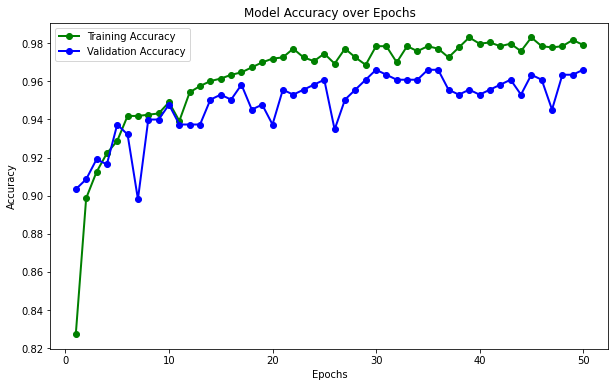

In [16]:
# Gráfica de accuracy en entrenamiento y en validación

plt.figure(figsize=(10, 6))

# Gráfica de accuracy en entrenamiento

plt.plot(range(1, 51), history.history["accuracy"], linewidth = 2, marker = "o", label = "Training Accuracy", color = "green")

# Gráfica de accuracy en validación

plt.plot(range(1, 51), history.history["val_accuracy"], linewidth = 2, marker = "o", label = "Validation Accuracy", color = "blue")

# Número de época: eje x

plt.xlabel("Epochs")

# Accuracy:  eje y

plt.ylabel("Accuracy")

# Título del gráfico

plt.title("Model Accuracy over Epochs")

# Leyenda del gráfico

plt.legend()

# Mostrar gráfico

plt.show()


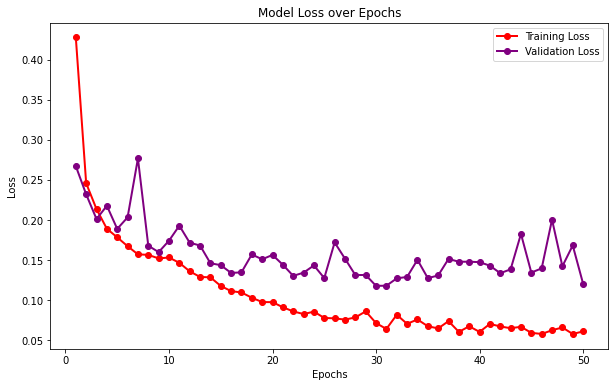

In [17]:
# Gráfica de pérdida en entrenamiento y en validación

plt.figure(figsize=(10, 6))

# Gráfica de pérdida (loss) en entrenamiento

plt.plot(range(1, 51), history.history["loss"], linewidth = 2, marker = "o", label = "Training Loss", color = "red")

# Gráfica de accuracy en validación

plt.plot(range(1, 51), history.history["val_loss"], linewidth = 2, marker = "o", label = "Validation Loss", color = "purple")

# Número de época: eje x

plt.xlabel("Epochs")

# Accuracy:  eje y

plt.ylabel("Loss")

# Título del gráfico

plt.title("Model Loss over Epochs")

# Leyenda del gráfico

plt.legend()

# Mostrar gráfico

plt.show()

### 12. Evaluate your model:
- See the result of your loss function.
- What can you deduct from there?

In [18]:
# Evaluación del modelo y valores finales de pérdida y accuracy

eval_loss = NN.evaluate(X_test, y_test)

print(f'Loss values: {eval_loss}')

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9630 - loss: 0.0830 
Loss values: [0.09551181644201279, 0.962421715259552]


En base a los valores finales de péridida y accuracy previos, es posible observar que el modelo en cuestión tiene un valor final de accuracy (exactitud) de 0.9630, mientras que su valor final de pérdida es de 0.0830, lo cual indica que en términos generales, el modelo resulta bastante efectivo para predecir de una manera correcta, la categoría de los alumnos (bajo, medio, alto) en base a las características de los mismos, por lo que el accuracy en este caso, señala que el modelo es capaz de predecir correctamente la categoría del 96.3% de todos los alumnos registrados, mientras que solamente resta un 3.7% de los alumnos para los cuales el modelo no predice correctamente su clasificación, además al tener un valor final de pérdida igualmente bajo, eso igualmente indica que el desempeño general del modelo es bastante favorable, en términos de la precisión y confiabilidad de sus predicciones, por lo que en resumen, el modelo generado es bastante efectivo para clasificar a los estudiantes. 

### 13. Use your model to make some predictions:
- Make predictions of your X_test dataset
- Print the each of the predictions and the actual value (which is in y_test)
- Replace the 'Low', 'Medium' and 'High' to your actual and predicted values.
- How good was your model?

In [19]:
# Realizar predicciones de los datos de prueba de X (X_test)

student_pred = NN.predict(X_test)

# Obtener la probabilidad más alta de las categorías para cada observación (será la categoría predicha)

predicted_labels = pd.DataFrame(student_pred).apply(lambda r: r.idxmax(), axis = 1)

# Mostrar categorías reales y predichas por el modelo

pr_values = pd.DataFrame({"Real": y_test.reset_index(drop = True), "Predicted": predicted_labels})

pr_values.replace({2:"Medium", 1:"Low", 0:"High"}, inplace = True)

pr_values


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,Real,Predicted
0,Medium,Medium
1,Low,Low
2,Low,Low
3,Medium,Medium
4,Low,Low
...,...,...
474,Low,Low
475,Low,Low
476,Low,Low
477,Medium,Medium


En términos generales, en el listado de valores reales contra predichos, se aprecia que la mayoría de las predicciones del modelo fueron correctas, por lo que solamente una pequeña proporción de las mismas fueron incorrectas, con esto se refuerza el hecho de que el modelo tiene un alto grado de exactitud (accuracy), lo cual implica que el modelo mismo es capaz de clasificar correctamente a la gran mayoría de los estudiantes de acuerdo con sus características, además de que dichos estudiantes son instancias que el modelo prácticamente desconocía, ya que eran datos que no había visto en su entrenamiento, por lo que, al ser capaz de generalizar adecuadamente su aprendizaje para clasificar a instancias (alumnos) desconocidas, se concluye que el modelo es bastante bueno. 

### 14. Compete against this model:
- Create two more different models to compete with this model
- Here are a few ideas of things you can change:
   - During Dataset data engineering:
      - You can remove features that you think do not help in the training and prediction 
      - Feature Scaling: Ensure all features are on a similar scale (as you already did with StandardScaler)
   - During Model Definition:
      - You can change the Model Architecture (change the type or number of layers or the number of units)
      - You can add dropout layers to prevent overfitting
   - During Model Compile:
      - You can try other optimizer when compiling your model, here some optimizer samples: Adam, RMSprop, or Adagrad.
      - Try another Loss Function
   - During Model Training:
      - Encrease the number of Epochs
      - Adjust the size of your batch
- Explain in a Markdown cell which changes are you implementing
- Show the comparison of your model versus the original model
   
   

#### Model 2:
- Changes:
   - Dataset Data Engineering: remover la variable Age, ParentalEducation y sports (se conservarán 4 predictores).
   - Model Definition: la capa de entrada será de 100 unidades y la oculta será de 75 unidades.
   - Model Compile: cambiar el tipo de optimizador por RMSprop
   - Model Training: Aumentar el número de épocas de entrenamiento a 80. 

In [26]:
# Nuevo dataset X2 para entrenar el modelo 2

X2 = X_train.iloc[:, [2, 3, 4, 6]]

X2

# Nota: el dataset de y para entrenar el modelo 2 será el mismo que para entrenar el modelo 1

,StudyTimeWeekly,Absences,ParentalSupport,GradeClass
1248,2.606814,17,3,4.0
1163,15.701437,7,3,2.0
1419,10.856827,0,3,0.0
2101,10.823761,7,2,3.0
2373,19.088954,25,2,1.0
...,...,...,...,...
8,4.562008,1,2,2.0
34,9.126336,27,2,4.0
1884,18.449978,5,0,3.0
2288,16.263643,19,3,2.0


In [23]:
# Definir modelo 2

NN2 = Sequential()

# Agregar capa de entrada de 100 unidades, dimensión de entrada igual a 4 y función de activación Relu

NN2.add(Dense(100, input_dim = 4, activation = "relu"))

# Agregar capa oculta de 75 unidades con función de activación Relu

NN2.add(Dense(75, activation = "relu"))

# Capa de salida con 3 categorías diferentes como resultado de las predicciones

NN2.add(Dense(3, activation="softmax"))

c:\Users\Rodolfo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
# Compilar el segundo modelo creado

NN2.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [30]:
# Entrenamiento del segundo modelo

NN2.fit(X2, y_train, epochs=80, batch_size=10, validation_split=0.2)

Epoch 1/80
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7869 - loss: 0.4682 - val_accuracy: 0.8799 - val_loss: 0.3023
Epoch 2/80
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - accuracy: 0.8644 - loss: 0.3181 - val_accuracy: 0.8877 - val_loss: 0.2816
Epoch 3/80
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.8969 - loss: 0.2620 - val_accuracy: 0.8982 - val_loss: 0.2460
Epoch 4/80
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - accuracy: 0.8961 - loss: 0.2447 - val_accuracy: 0.9138 - val_loss: 0.2075
Epoch 5/80
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - accuracy: 0.8827 - loss: 0.2880 - val_accuracy: 0.9086 - val_loss: 0.2222
Epoch 6/80
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - accuracy: 0.9085 - loss: 0.2361 - val_accuracy: 0.9112 - val_loss: 0.2262
Epoch 7/80
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9093 - loss: 0.2256 - val_accuracy: 0.9138 - val_loss: 0.2012
Epoch 8/80
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - accuracy: 0.9129 - loss: 0.2182 - val_

In [34]:
# Evaluación del segundo modelo

eval2 = NN2.evaluate(X_test.iloc[:, [2, 3, 4, 6]], y_test)

print(f'Loss values modelo 2: {eval2}')

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - accuracy: 0.9823 - loss: 0.0618
Loss values modelo 2: [0.08200620859861374, 0.9770354628562927]


#### Model 3:
- Changes:
   - Dataset Data Engineering: No habrá ningún cambio, por lo que se usarán las mismas variables predictoras que en el modelo 2.
   - Model Definition: La capa de entrada será de 115 unidades y la capa oculta tendrá 90 unidades. 
   - Model Compile: cambiar el tipo de optimizador a Adagrad. 
   - Model Training: Aumentar el número de épocas de entrenamiento a 100.

In [35]:
# Definir el tercer modelo

NN3 = Sequential()

# Agregar la capa de entrada con función de activación Relu, dimensión de entrada 4 y 115 unidades.

NN3.add(Dense(115, input_dim = 4, activation = "relu"))

# Agregar la capa oculta con función de activación Relu y con 90 unidades

NN3.add(Dense(90, activation = "relu"))

# Capa de salida con 3 categorías diferentes como resultado de las predicciones

NN3.add(Dense(3, activation="softmax"))

c:\Users\Rodolfo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
# Compilación del modelo 3

NN3.compile(optimizer="adagrad", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [37]:
# Entrenamiento del modelo 3

NN3.fit(X2, y_train, epochs=100, batch_size=10, validation_split=0.2)

Epoch 1/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7315 - loss: 0.6209 - val_accuracy: 0.8695 - val_loss: 0.3677
Epoch 2/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - accuracy: 0.8065 - loss: 0.4309 - val_accuracy: 0.8747 - val_loss: 0.3442
Epoch 3/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - accuracy: 0.8328 - loss: 0.3829 - val_accuracy: 0.8930 - val_loss: 0.3238
Epoch 4/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - accuracy: 0.8395 - loss: 0.3693 - val_accuracy: 0.8903 - val_loss: 0.3149
Epoch 5/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - accuracy: 0.8371 - loss: 0.3654 - val_accuracy: 0.8930 - val_loss: 0.3047
Epoch 6/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - accuracy: 0.8485 - loss: 0.3467 - val_accuracy: 0.8982 - val_loss: 0.2972
Epoch 7/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8612 - loss: 0.3354 - val_accuracy: 0.8956 - val_loss: 0.2938
Epoch 8/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8473 - loss: 0.3449 

In [38]:
# Evaluación del modelo 3

eval3 = NN3.evaluate(X_test.iloc[:, [2, 3, 4, 6]], y_test)

print(f'Loss values modelo 3: {eval3}')

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - accuracy: 0.9179 - loss: 0.2140
Loss values modelo 3: [0.24426013231277466, 0.8956158757209778]


## Tabla con valores finales de accuracy y pérdida (loss) para los 3 modelos

|Modelo|Accuracy|Loss|
|------|--------|----|
|Modelo 1 (original)|0.9630|0.0830|
|Modelo 2|0.9823|0.0618|
|Modelo 3|0.9179|0.2140|

## Tabla con predicciones de la clasificación para 5 alumnos del dataset de prueba

In [39]:
# Dataset de prueba para visualizar cuáles alumnos se encuentran en este dataset

X_test

,Age,ParentalEducation,StudyTimeWeekly,Absences,ParentalSupport,Sports,GradeClass
194,17,0,13.483739,11,1,0,2.0
796,15,0,3.232754,13,2,1,4.0
691,16,2,6.916571,22,2,0,4.0
1022,16,1,11.543995,1,2,1,1.0
1147,16,1,8.824593,17,3,0,4.0
...,...,...,...,...,...,...,...
948,16,2,5.665931,22,1,1,4.0
1004,15,4,0.135763,17,2,1,4.0
1502,16,3,10.674508,18,2,0,4.0
1629,16,1,16.827135,17,3,0,3.0


In [42]:
# Tomar 5 alumnos del dataset de prueba

muestra5 = X_test.loc[[194, 691, 1502, 1022, 2182], :]

muestra5

,Age,ParentalEducation,StudyTimeWeekly,Absences,ParentalSupport,Sports,GradeClass
194,17,0,13.483739,11,1,0,2.0
691,16,2,6.916571,22,2,0,4.0
1502,16,3,10.674508,18,2,0,4.0
1022,16,1,11.543995,1,2,1,1.0
2182,17,3,17.086920,25,2,0,2.0


In [43]:
# Predecir la clasificación de alumnos con el modelo 2

pM2 = NN2.predict(muestra5.iloc[:, :4])

# Predecir la clasificacuión de alumnos con el modelo 3

pM3 = NN3.predict(muestra5.iloc[:, :4])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [44]:
# Definir función lambda para encontrar la probabilidad predicha más alta por cada observación que corresponde a la categoría predicha

p_max = lambda row: row.idxmax()

In [45]:
# Convertir los valores de las predicciones de los 2 modelos a series y reemplazar por la respectiva categoría de desempeño

pM2 = pd.DataFrame(pM2).apply(p_max, axis = 1).replace({2:"Medium", 1:"Low", 0:"High"})

pM3 = pd.DataFrame(pM3).apply(p_max, axis = 1).replace({2:"Medium", 1:"Low", 0:"High"})

In [66]:
# Crear un dataframe o tabla de datos con las predicciones correspondientes a los 3 modelos

predictions_3M = pd.DataFrame({"Clasif_M1": predicted_labels[[0, 2, 476, 3, 478]].reset_index(drop=True).replace({2:"Medium",1:"Low",0:"High"}), 
                               "Clasif_M2": pM2, 
                               "Clasif_M3": pM3, 
                               "Clasif_real": y_test[[194, 691, 1502, 1022, 2182]].reset_index(drop=True).replace({2:"Medium",1:"Low", 0:"High"})})

# Índices reales de los 5 alumnos elegidos para clasificar

predictions_3M.index = [194, 691, 1502, 1022, 2182]

# Nombrar el índice del dataframe como students

predictions_3M.index.name = "Student"

# Mostrar dataframe

predictions_3M

,Clasif_M1,Clasif_M2,Clasif_M3,Clasif_real
Student,,,,
194,Medium,Low,Medium,Medium
691,Low,Low,Medium,Low
1502,Low,Low,Medium,Low
1022,Medium,High,High,Medium
2182,Low,Low,Medium,Low


Finalmente, en base a los resultados previos, se aprecia que el modelo 1 (el generado inicialmente) tiene una exactitud del 96.3% y una pérdida del 8.3%, mientras que el modelo 2 posee una exactitud del 98.23% junto con una pérdida del 6.18% y finalmente el modelo 3, tiene una exactitud del 91.79% y una pérdida del 21.4%, por lo que al comparar éstas 2 medidas de los 3 modelos, es posible concluir que aquel modelo que tiene el mejor desempeño al momento de clasificar a los estudiantes es el modelo 2, debido a que es el que tiene el mayor porcentaje de exactitud (accuracy), siendo éste mismo del 98.23% y con un porcentaje de pérdida mayormente bajo del 6.18%, además éste último porcentaje (pérdida), resulta ser el menor de todas las pérdidas, por lo cual, el modelo 2 prácticamente posee tanto el mayor porcentaje de exactitud como el menor porcentaje de pérdida posibles, indicando que el modelo 2 es el mejor de los 3 para clasificar a los estudiantes en las categorías Low, Medium y High, en base a sus características más relevantes con un alto grado de precisión y confiabilidad. 